**¿Para qué se usa el EDA?**

El Análisis Exploratorio de Datos (EDA) es una fase crucial en el proceso de análisis de datos que busca comprender la distribución, patrones y características de un conjunto de datos antes de aplicar modelos o análisis avanzados. A través del EDA, se exploran y comprenden la distribución de variables, se identifican patrones, se abordan datos faltantes, se preparan los datos para modelado, se validan suposiciones y se comunican resultados. Esta etapa es esencial para tomar decisiones informadas y garantizar una comprensión profunda de los datos antes de realizar análisis más avanzados o aplicar modelos de aprendizaje automático.

 **Librerias Necesarias**

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

**Cargar ficheros**

In [ ]:
ruta_archivo = '/content/COCHES.csv'

# Carga el archivo CSV en un DataFrame
df_coches = pd.read_csv(ruta_archivo)

**¿Cuántas observaciones y variables hay?**

In [ ]:
filas, columnas = df_coches.shape
print(f"Número de observaciones (filas): {filas}")
print(f"Número de variables (columnas): {columnas}")

Número de observaciones (filas): 7253
Número de variables (columnas): 14


**Muestra las primeras observaciones**

In [ ]:
df_coches.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**Ayuda a comprender el tipo de datos y la información sobre los datos, incluido el número de registros en cada columna, los datos que tienen nulos o no, el tipo de datos y el uso de memoria del conjunto de datos**

In [ ]:
df_coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**Verifica si hay datos duplicados**

In [ ]:
df_coches.duplicated().sum()

0

In [ ]:
df_coches.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [ ]:
def contar_valores(df):
    conteo_por_columna = {}

    for columna in df.columns:
        conteo = df[columna].value_counts()
        conteo_por_columna[columna] = conteo

    return conteo_por_columna

# Aplicar la función y mostrar el resultado
resultados = contar_valores(df_coches)
for columna, conteo in resultados.items():
    print(f"Conteo de valores para la columna '{columna}':")
    print(conteo)
    print()

Conteo de valores para la columna 'S.No.':
0       1
4818    1
4844    1
4843    1
4842    1
       ..
2413    1
2412    1
2411    1
2410    1
7252    1
Name: S.No., Length: 7253, dtype: int64

Conteo de valores para la columna 'Name':
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

Conteo de valores para la columna 'Location':
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: L

**Calcula cuantos valores faltan por variable**

In [ ]:
df_coches.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [ ]:
def contar_nan_por_columna(df):
    # Aplicar isna() para identificar los NaN y sumarlos por columna
    nan_por_columna = df.isna().sum()

    return nan_por_columna


nan_por_columna_resultado = contar_nan_por_columna(df_coches)
nan_por_columna_resultado


S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

**Calcula el porcentaje de valores faltantes en cada columna**

In [ ]:
(df_coches.isnull().sum()/(len(df_coches)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [ ]:
def porcentaje_nan_por_columna(df):
    porcentaje_nan_por_columna = (df.isna().mean() * 100).round(2)

    return porcentaje_nan_por_columna

porcentaje_nan_resultado = porcentaje_nan_por_columna(df_coches)
porcentaje_nan_resultado

S.No.                 0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 0.63
Seats                 0.73
New_Price            86.13
Price                17.01
dtype: float64

**¿Qué columnas podrías eliminar que no aporten valor a nuestro análisis?**

En este caso como no tenemos definido aún nuestro objetivo y estamos analizando los datos, cualquier columna nos puede servir para un estudio posterior. Pero también encontramos una columna 'S.No.' que hace referencia a un índice, con lo cual no es relevante otro indice en nuestro df, así que lo eliminamos.

In [ ]:
df_coches.drop('S.No.', axis=1,inplace=True)
df_coches.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**Calcula la edad del coche en función  del año de fabricación (Year)**

In [ ]:
año_actual = datetime.now().year  #Calcular año actual

df_coches['Edad'] = año_actual - df_coches['Year']  #Creo una nueva columna con la edad restando el año actual - los valores (años) de la columna 'year'

df_coches

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Edad
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN,13
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN,9
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN,12
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN,11


**Extrae la Marca y el Modelo del coche a partir del Name**

In [ ]:
def obtener_marca(cadena):
    return cadena.split()[0]

def obtener_modelo(cadena):
    return cadena.split()[1]

df_coches['Marca'] = df_coches['Name'].apply(obtener_marca)
df_coches['Modelo'] = df_coches['Name'].apply(obtener_modelo)
df_coches.drop('Name', axis=1, inplace=True)

df_coches.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Edad,Marca,Modelo
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi,A4


**Limpieza de datos: la marca 'Isuzu', 'ISUZU', 'Mini' y 'Land' parecen incorrecta. Esto hay que corregirlo**

In [ ]:
df_coches['Marca'].value_counts()
# Define un diccionario de reemplazo (valor_original: nuevo_valor)
cambios = {'ISUZU': 'Isuzu', 'Land': 'Land-Rover'}

# Aplica los cambios en la columna 'Columna1' usando el método replace
df_coches['Marca'] = df_coches['Marca'].replace(cambios)

**Muestra las estadísticas de los datos :**

**¿Qué rango de años hay?**

In [ ]:
df_coches.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Edad,7253.0,10.634634,3.254421,5.00,8.0,10.00,13.00,28.0


In [ ]:
año_minimo = df_coches['Year'].min()
año_maximo = df_coches['Year'].max()
print(f'El coche mas antiguo es de {año_minimo} y el mas nuevo es {año_maximo}')

El coche mas antiguo es de 1996 y el mas nuevo es 2019


**¿Qué modelo de coches usados se usan más los antiguos o los modelos nuevos?**

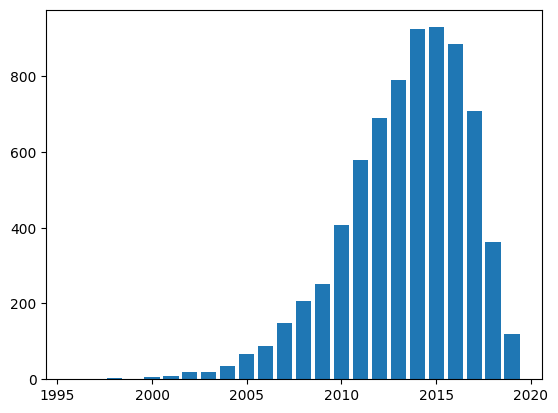

In [ ]:
cantidad = df_coches['Year'].value_counts().sort_index()
plt.bar(cantidad.index, cantidad)
plt.show()

**Promedio de km recorridos.  ¿Hay mucha diferencia entre el mínimo y el máximo?**

In [ ]:
promedio_km = df_coches['Kilometers_Driven'].mean()

min_km = df_coches['Kilometers_Driven'].min()
max_km = df_coches['Kilometers_Driven'].max()

diferencia_km = max_km - min_km

print(f"Promedio de Kilómetros Recorridos: {promedio_km:.2f} km")
print(f"Mínimo de Kilómetros Recorridos: {min_km} km")
print(f"Máximo de Kilómetros Recorridos: {max_km} km")
print(f"Diferencia entre Mínimo y Máximo: {diferencia_km} km")

Promedio de Kilómetros Recorridos: 58699.06 km
Mínimo de Kilómetros Recorridos: 171 km
Máximo de Kilómetros Recorridos: 6500000 km
Diferencia entre Mínimo y Máximo: 6499829 km


**¿Dónde hay valores atípicos?**

In [ ]:
df_coches.fillna(method="pad", inplace=True) #Valores nulos convertirlos a la ultima observación válida

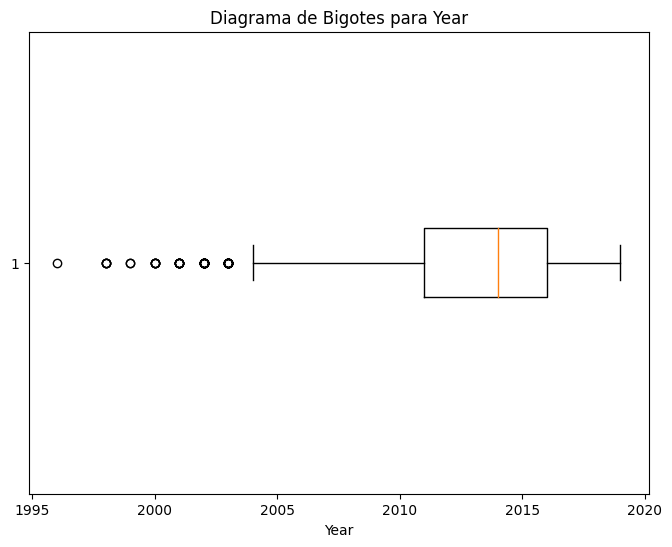

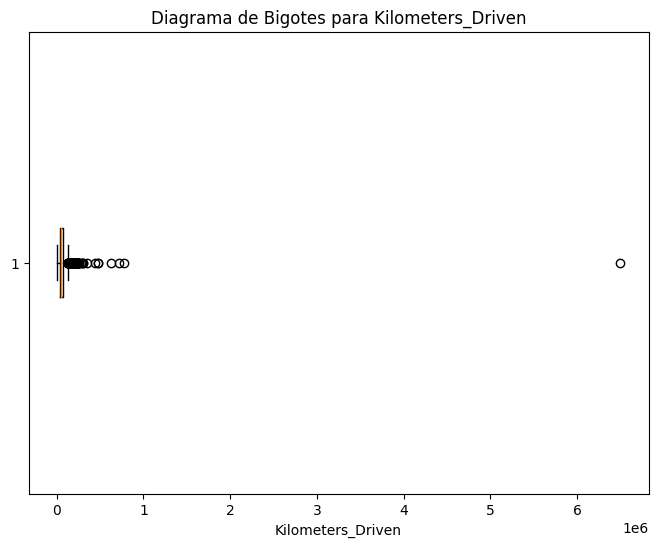

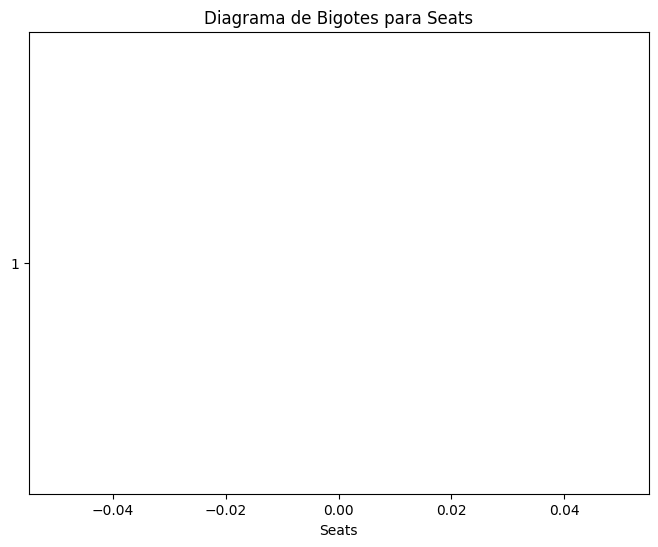

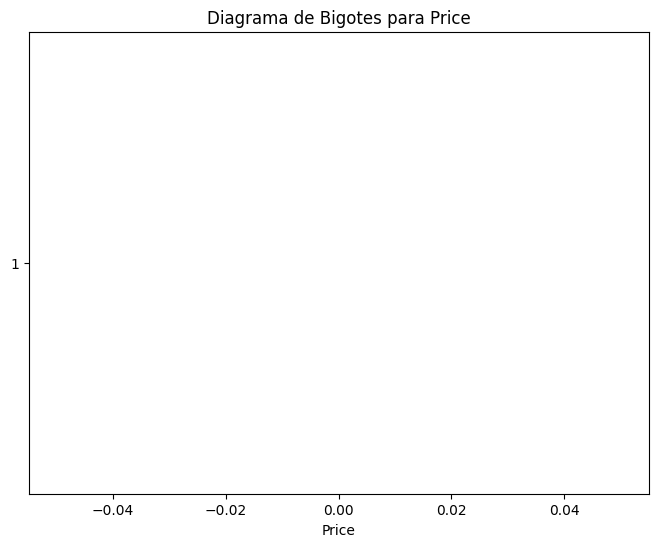

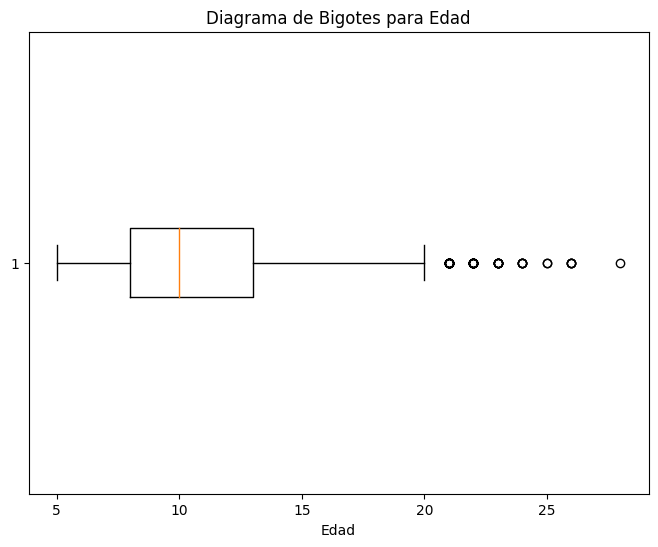

In [ ]:
def diagrama_bigotes_por_columnas(df, columnas):
    for columna in columnas:
        # Verifica si la columna está en el DataFrame
        if columna in df.columns:
            # Selecciona la columna actual
            columna_actual = df[columna]

            # Crea un diagrama de bigotes
            plt.figure(figsize=(8, 6))
            plt.boxplot(columna_actual, vert=False)
            plt.title(f'Diagrama de Bigotes para {columna}')
            plt.xlabel(columna)
            plt.show()
        else:
            print(f"La columna '{columna}' no está presente en el DataFrame.")

columnas_numericas = list(df_coches.dtypes[df_coches.dtypes != 'object'].index)

diagrama_bigotes_por_columnas(df_coches, columnas_numericas)

**¿Cómo separarías las variables numéricas y categóricas para facilitar el análisis?**

In [ ]:
categorical = list(df_coches.dtypes[df_coches.dtypes == 'object'].index)
numerical = list(df_coches.dtypes[df_coches.dtypes != 'object'].index)

print("Variables categoricas", categorical)
print("Variables NO categoricas", numerical)

Variables categoricas ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price', 'Marca', 'Modelo']
Variables NO categoricas ['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Edad']


**Analizar/visualizar el conjunto de datos tomando una variable a la vez, haz uso de Matplotlib y Seaborn:**

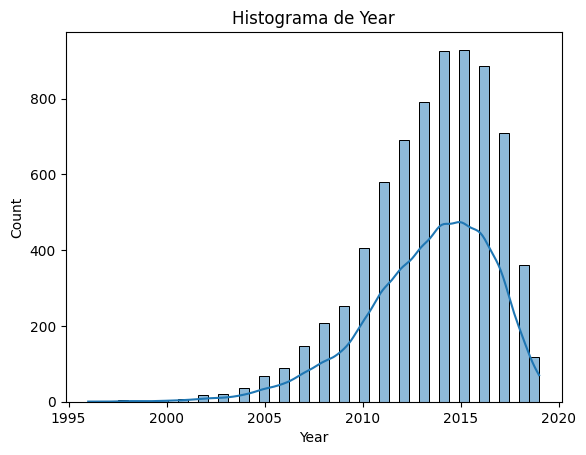

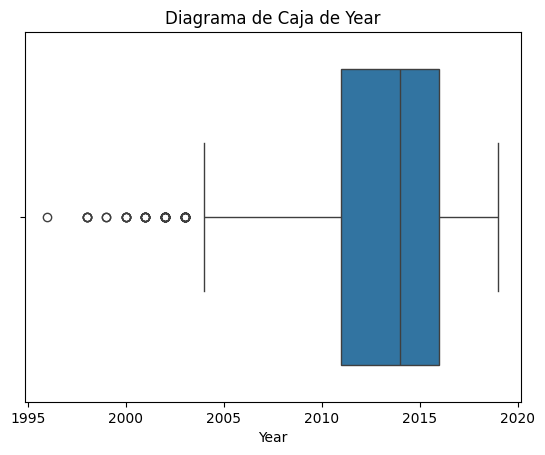

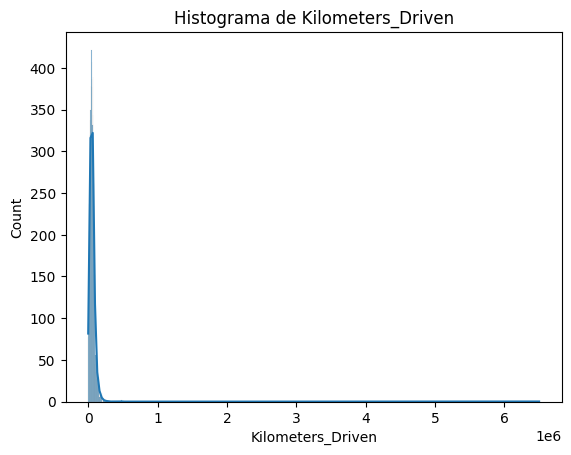

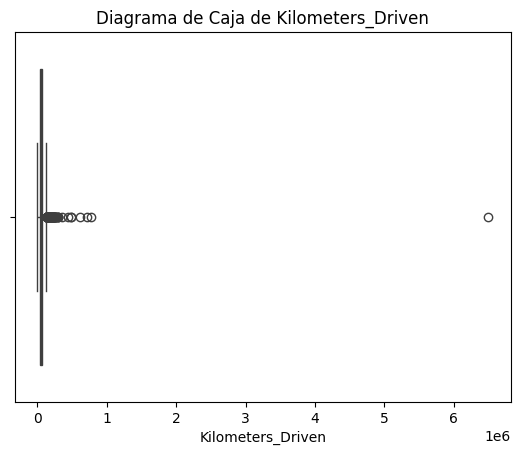

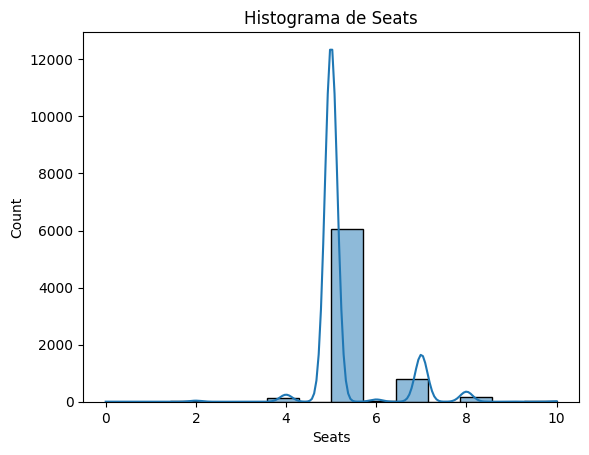

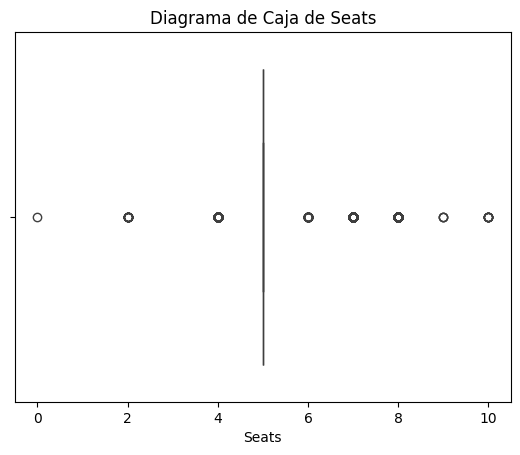

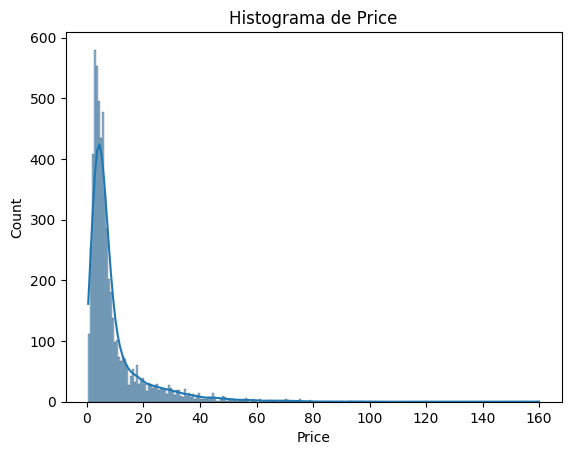

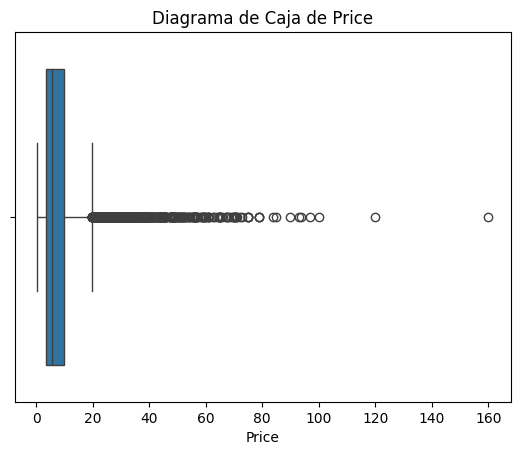

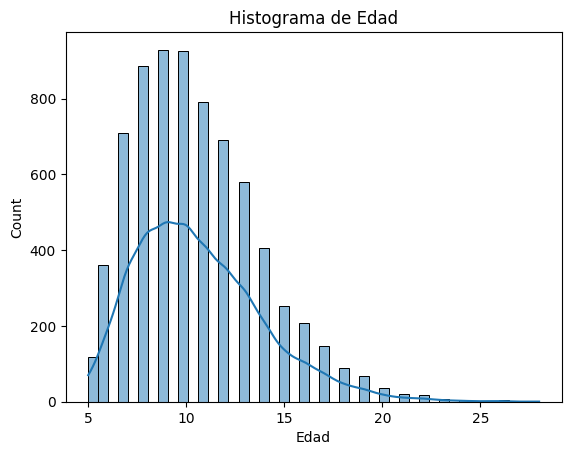

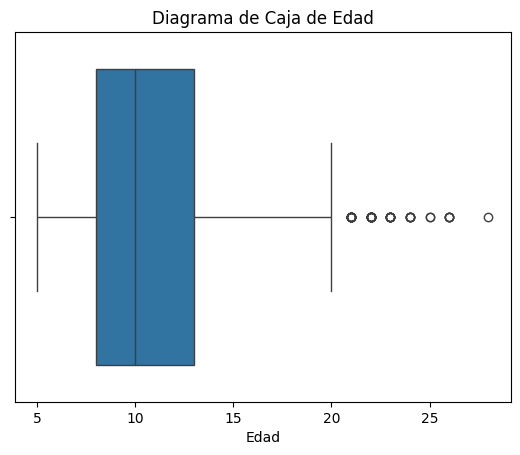

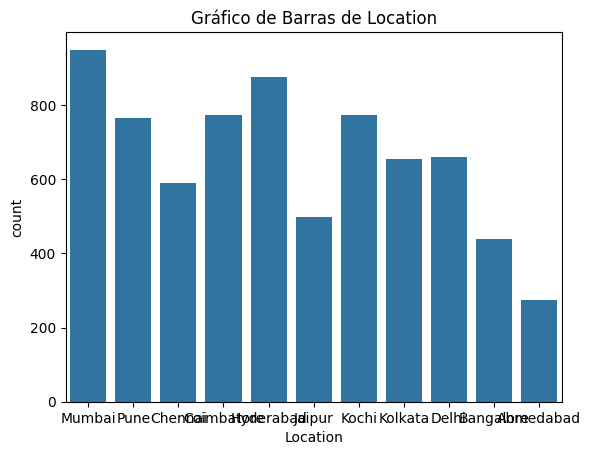

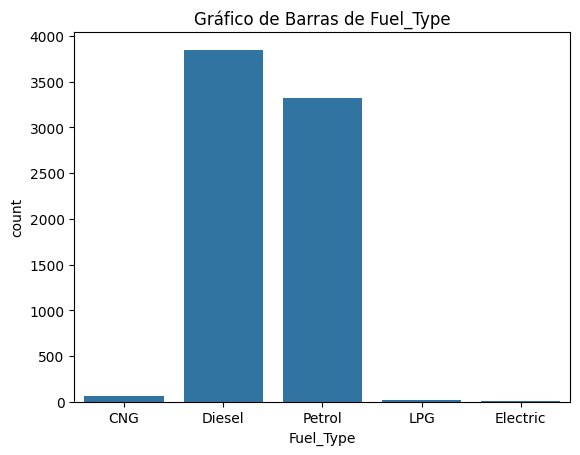

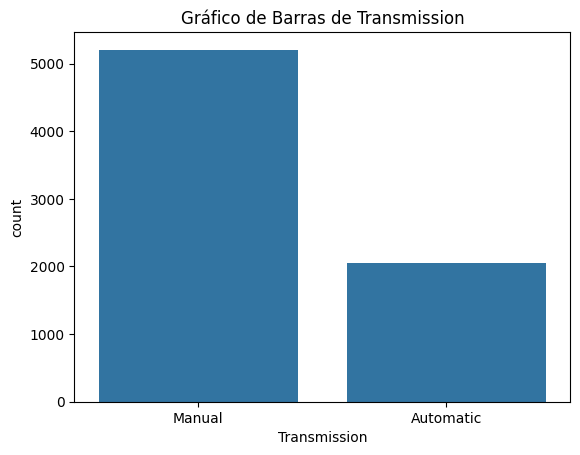

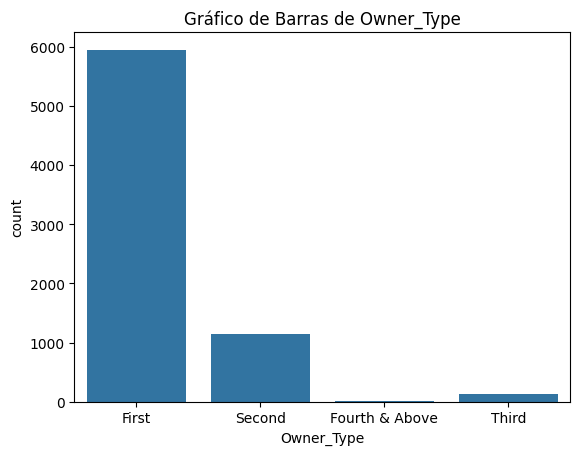

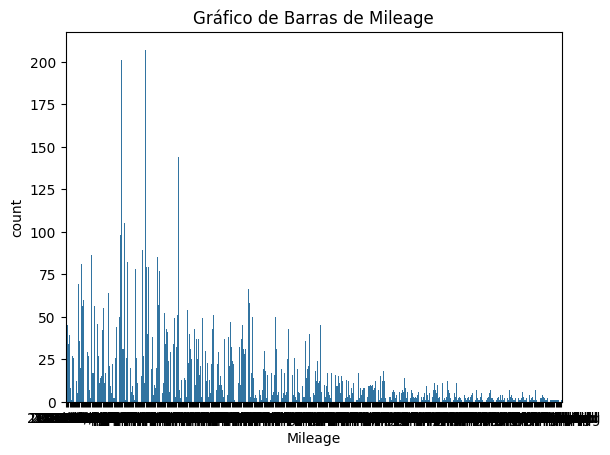

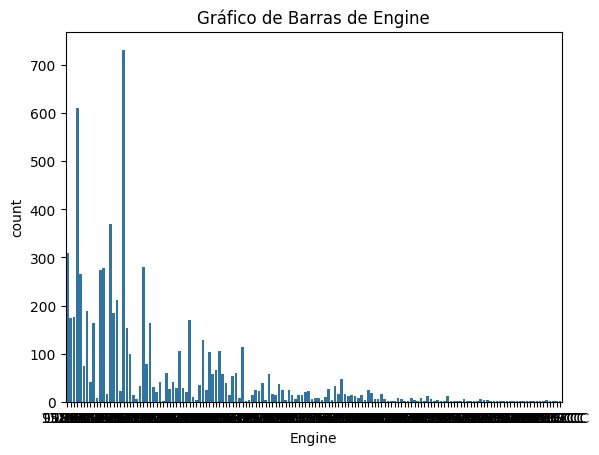

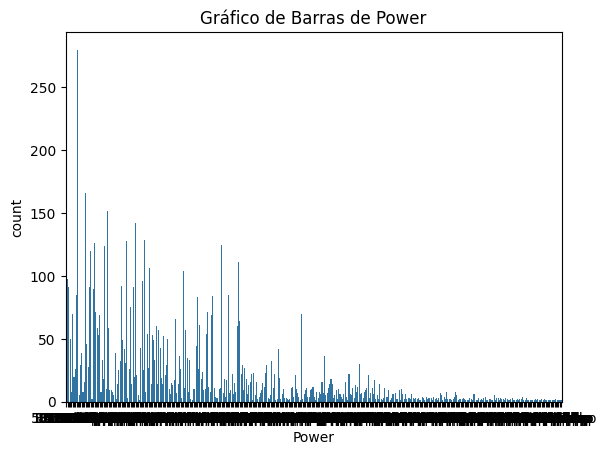

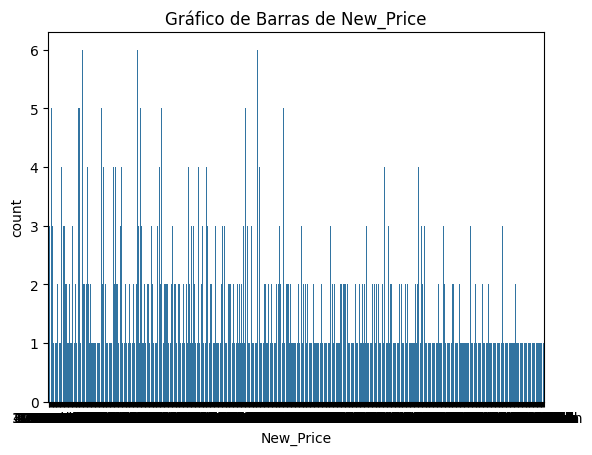

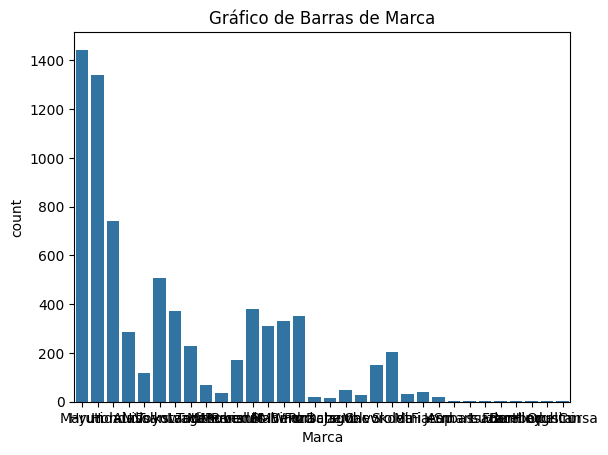

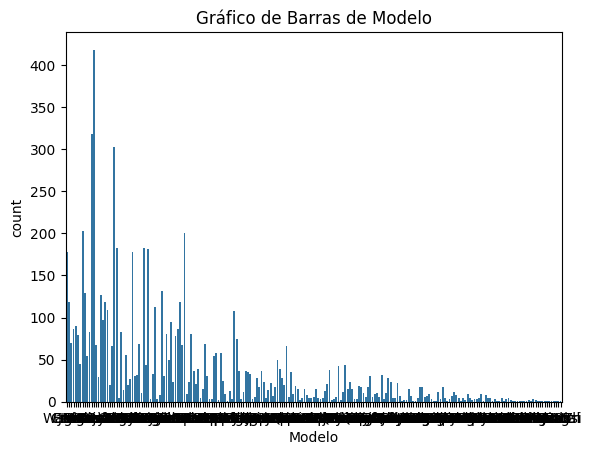

In [ ]:
import seaborn as sns

def visualizar_numericas(df, columnas_numericas):
    for columna in columnas_numericas:
        # Histograma
        sns.histplot(df[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        plt.show()

        # Diagrama de Caja (Boxplot)
        sns.boxplot(x=df[columna])
        plt.title(f'Diagrama de Caja de {columna}')
        plt.show()

def visualizar_categoricas(df, columnas_categoricas):
    for columna in columnas_categoricas:
        # Gráfico de Barras
        sns.countplot(x=df[columna])
        plt.title(f'Gráfico de Barras de {columna}')
        plt.show()

# Visualizar columnas numéricas
visualizar_numericas(df_coches, numerical)

# Visualizar columnas categóricas
visualizar_categoricas(df_coches, categorical)


**La visualización de datos es esencial, debemos decidir qué gráficos trazar para comprender mejor los datos. ¿Qué puedes deducir a partir de estos gráficos?**

Podemos deducir como se distribuyen los datos en un gráfico y entenderlo mejor ya que es de forma visual.

**Si has encontrado variables muy sesgadas, normaliza**

In [ ]:
from scipy.stats import skew

def calcular_sesgo(df, columnas_numericas):
    resultados_sesgo = {}

    for columna in columnas_numericas:
        coeficiente_sesgo = skew(df[columna])
        resultados_sesgo[columna] = coeficiente_sesgo

    return resultados_sesgo

resultados = calcular_sesgo(df_coches, numerical)

# Imprimir resultados
for columna, sesgo in resultados.items():
    print(f"Coeficiente de Sesgo para {columna}: {sesgo}")

Coeficiente de Sesgo para Year: -0.8061938087279114
Coeficiente de Sesgo para Kilometers_Driven: 0.38020481169034165
Coeficiente de Sesgo para Seats: nan
Coeficiente de Sesgo para Price: 1.3422409032262859
Coeficiente de Sesgo para Edad: 0.8061938087279114


Como hemos obtenido 2 columnas principales con mucho sesgo, antes de normalizar, eliminaremos los valores atipicos y volveremos a calcular el sesgo

In [ ]:
def eliminar_valores_atipicos(df, columnas):
    df_sin_atipicos = df.copy()

    for columna in columnas:
        q1 = df_sin_atipicos[columna].quantile(0.25)
        q3 = df_sin_atipicos[columna].quantile(0.75)
        iqr = q3 - q1

        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        df_sin_atipicos = df_sin_atipicos[(df_sin_atipicos[columna] >= limite_inferior) & (df_sin_atipicos[columna] <= limite_superior)]

    return df_sin_atipicos

# Ejemplo de uso:
# Supongamos que df es tu DataFrame y columnas_elegidas es la lista de columnas que deseas limpiar
columnas_sesgadas = ['Kilometers_Driven', 'Price']
df_coches = eliminar_valores_atipicos(df_coches, columnas_sesgadas)

Volvemos a calcular el sesgo

In [ ]:
resultados = calcular_sesgo(df_coches, numerical)

# Imprimir resultados
for columna, sesgo in resultados.items():
    print(f"Coeficiente de Sesgo para {columna}: {sesgo}")

Coeficiente de Sesgo para Year: -0.7998074330984314
Coeficiente de Sesgo para Kilometers_Driven: 0.31704799927406313
Coeficiente de Sesgo para Seats: nan
Coeficiente de Sesgo para Price: 0.8992883804771769
Coeficiente de Sesgo para Edad: 0.7998074330985273


Normalizamos el df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalizar_columnas(df, columnas_numericas):
    df_normalizado = df.copy()
    scaler = MinMaxScaler()
    df_normalizado[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])
    return df_normalizado

df_coches = normalizar_columnas(df_coches, numerical)
df_coches.describe()

,Year,Kilometers_Driven,Seats,Price,Edad
count,4757.000000,4757.000000,4723.000000,4757.000000,4757.000000
mean,0.723836,0.426180,0.403107,0.356979,0.276164
std,0.155995,0.208102,0.088766,0.213234,0.155995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.619048,0.271984,0.375000,0.197566,0.142857
50%,0.761905,0.420509,0.375000,0.312097,0.238095
75%,0.857143,0.561265,0.375000,0.468862,0.380952
max,1.000000,1.000000,1.000000,1.000000,1.000000


**Realiza un análisis bivariado que  ayude a comprender cómo se relacionan las variables entre sí y la relación entre las variables dependientes e independientes presentes en el conjunto de datos. Indica lo que has observado.**

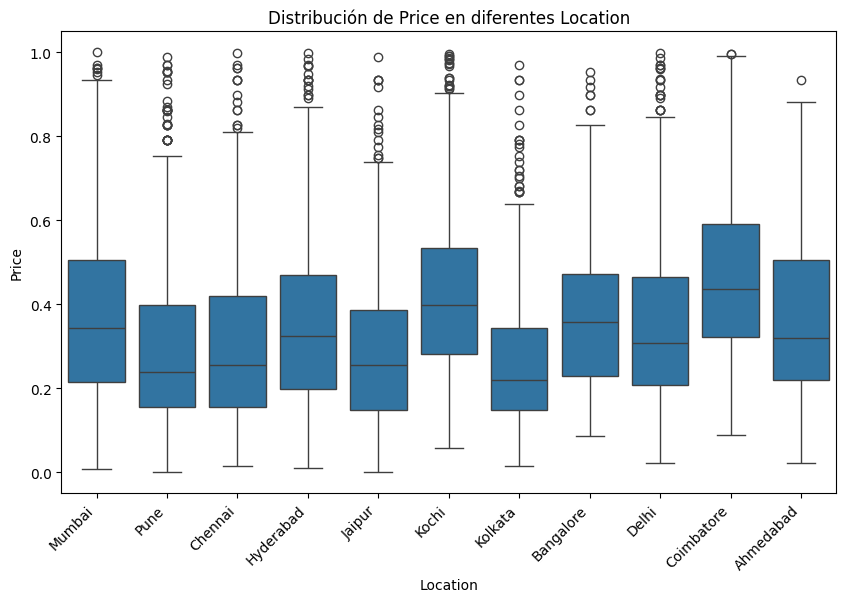

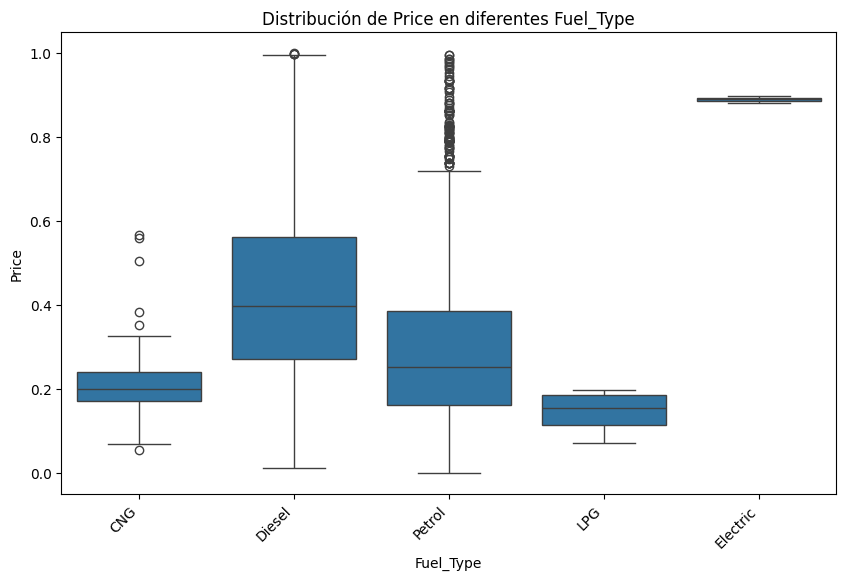

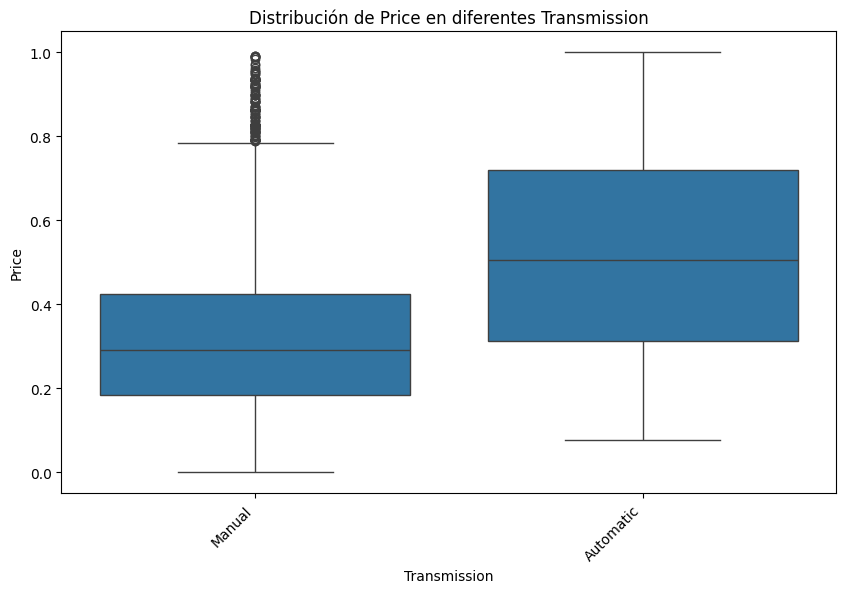

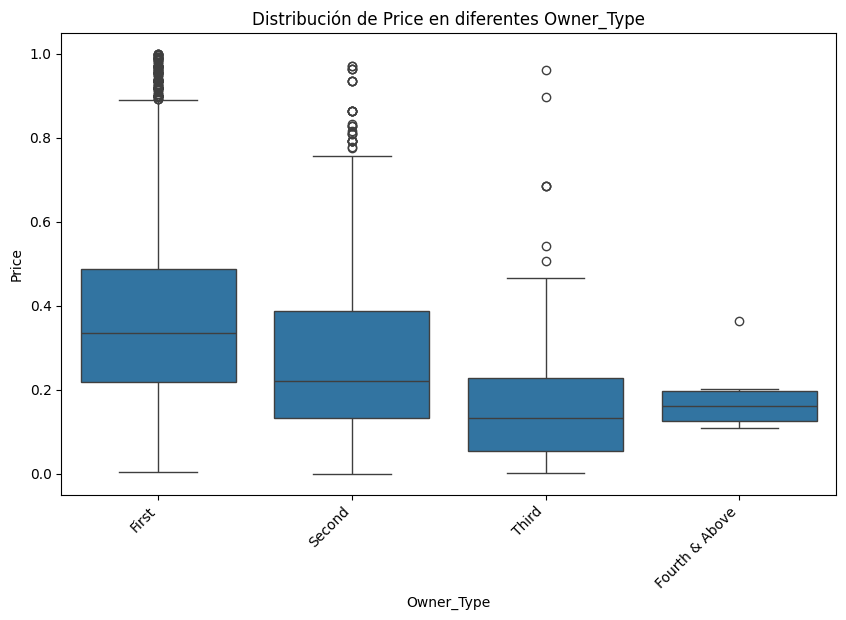

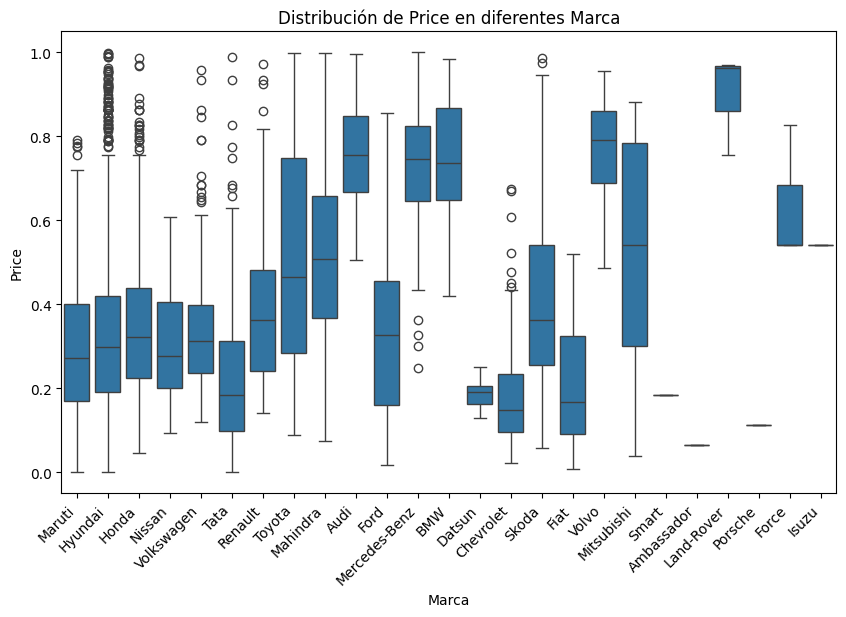

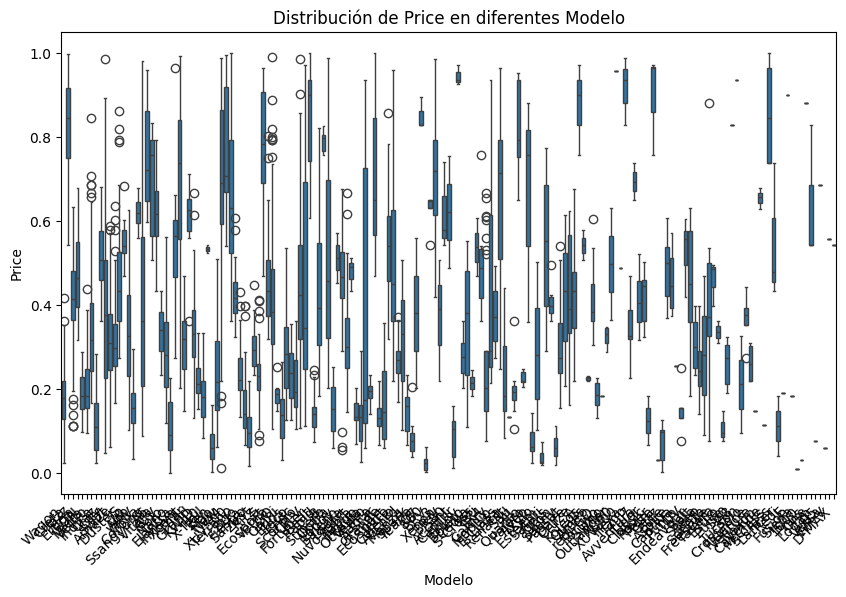

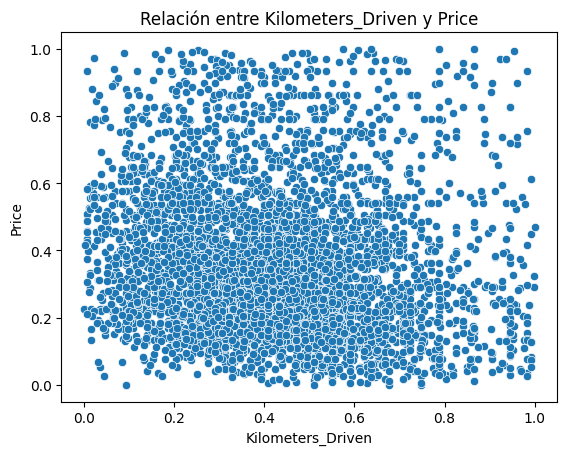

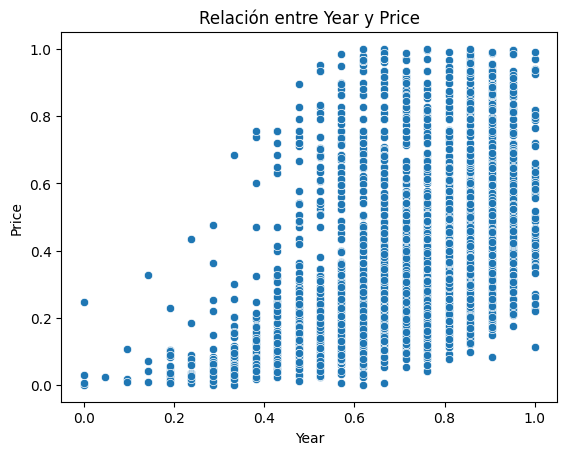

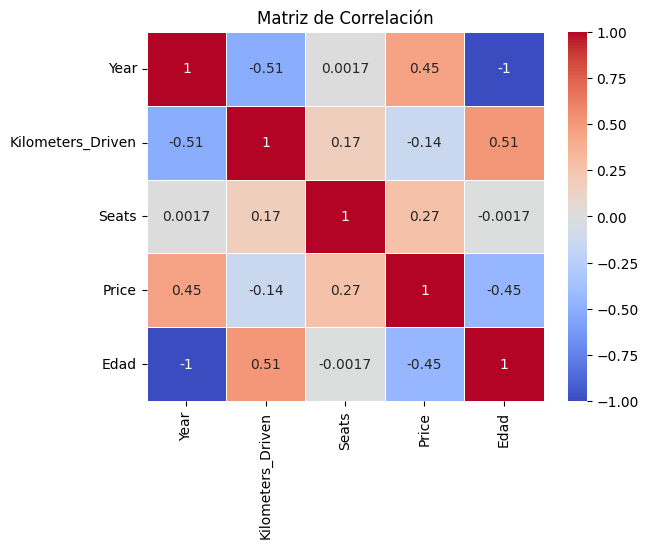

In [ ]:
# Ejemplo de box plots
for columna_categorica in ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Marca', 'Modelo']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_coches, x=columna_categorica, y='Price')
    plt.title(f'Distribución de Price en diferentes {columna_categorica}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Ejemplo de scatter plots
sns.scatterplot(data=df_coches, x='Kilometers_Driven', y='Price')
plt.title('Relación entre Kilometers_Driven y Price')
plt.show()

sns.scatterplot(data=df_coches, x='Year', y='Price')
plt.title('Relación entre Year y Price')
plt.show()

# Ejemplo de matriz de correlación
matriz_correlacion = df_coches[['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Edad']].corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

**Crea un diagrama de barras para mostrar la relación entre variables categóricas y variables continuas. Indica lo que has observado**

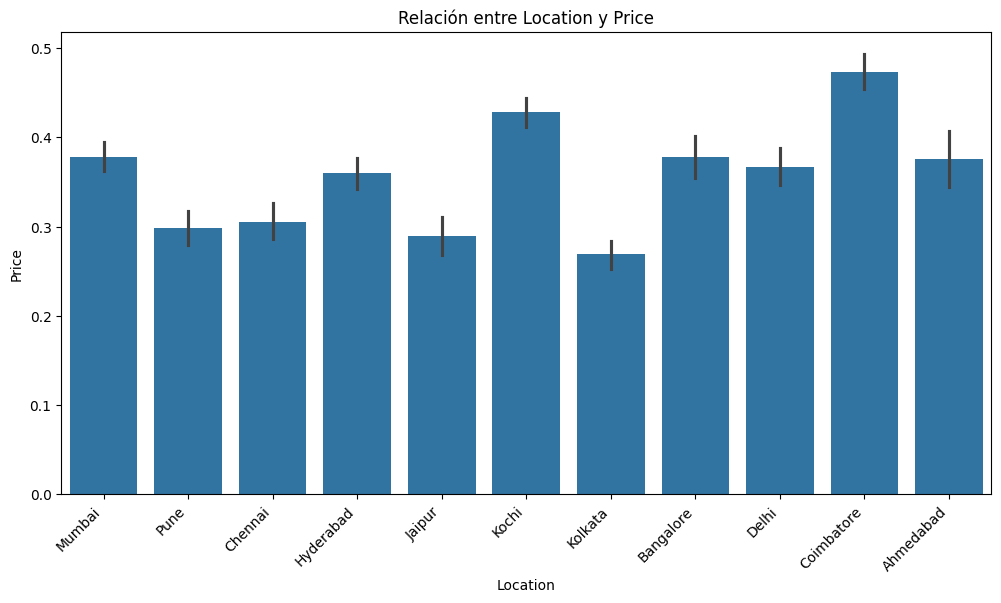

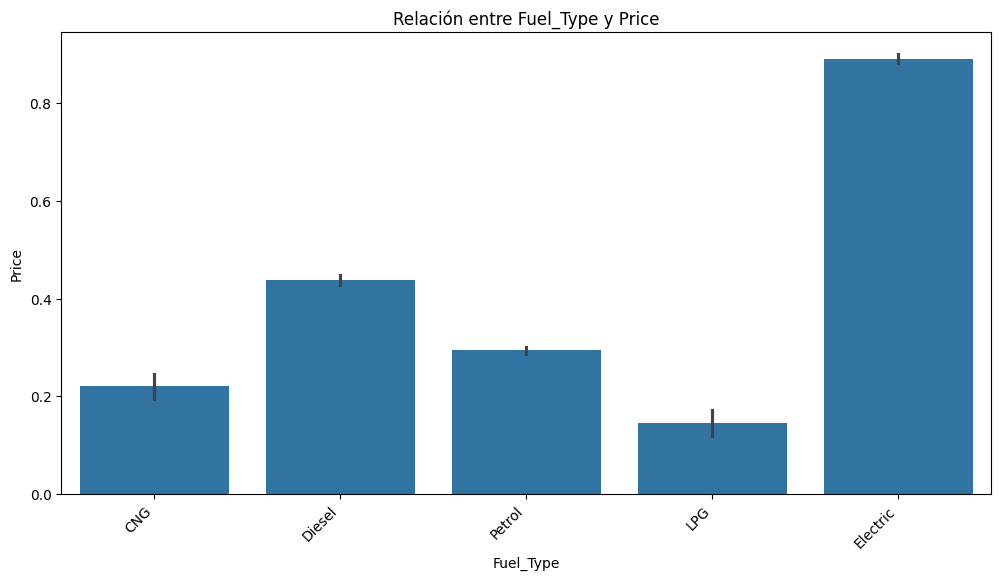

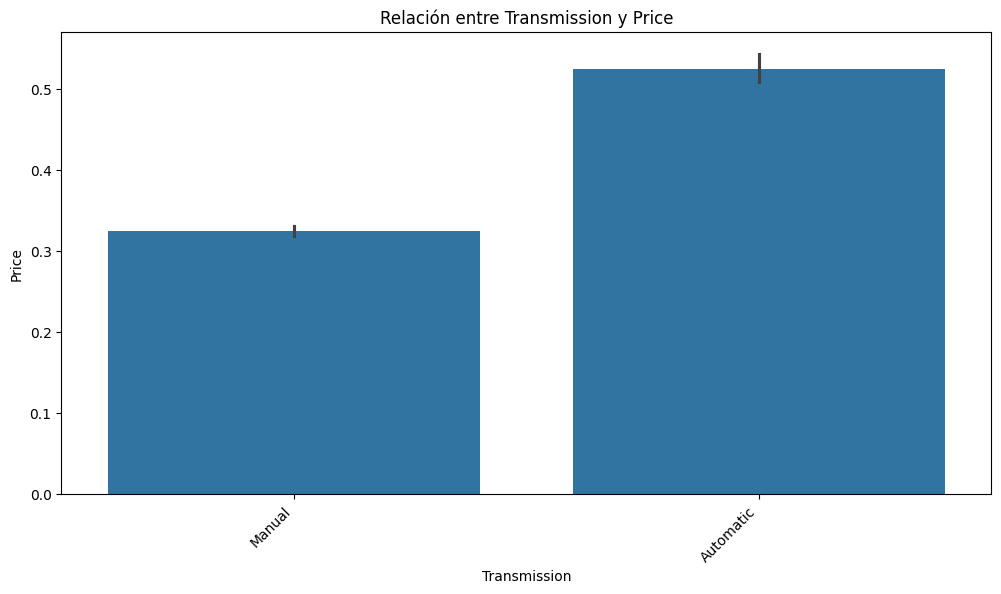

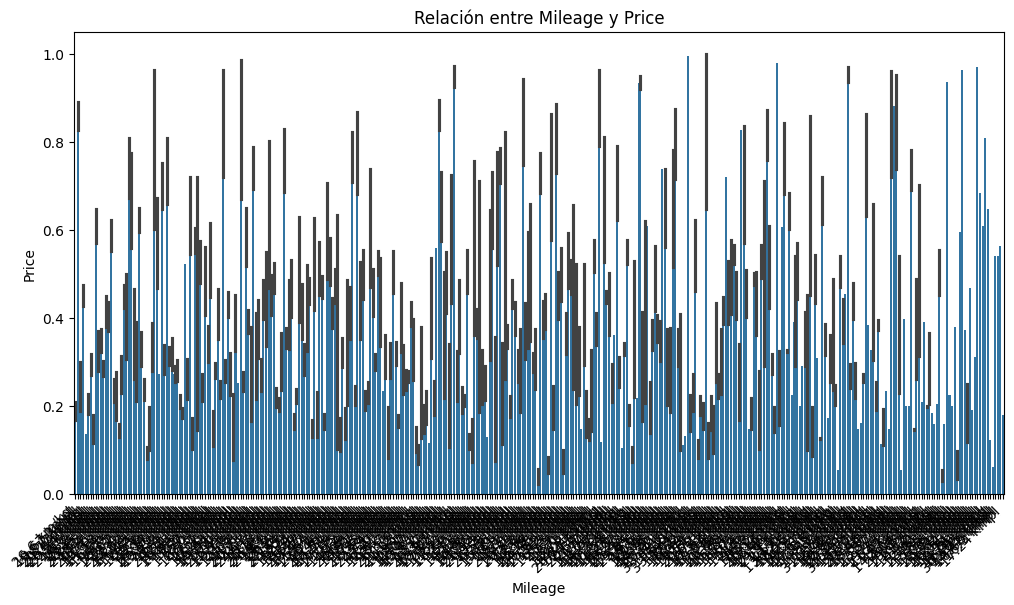

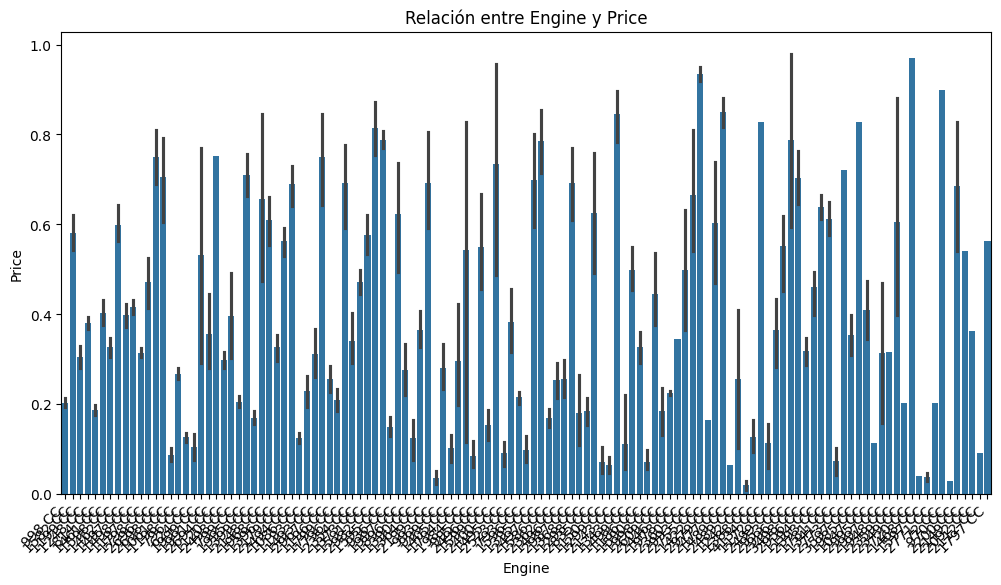

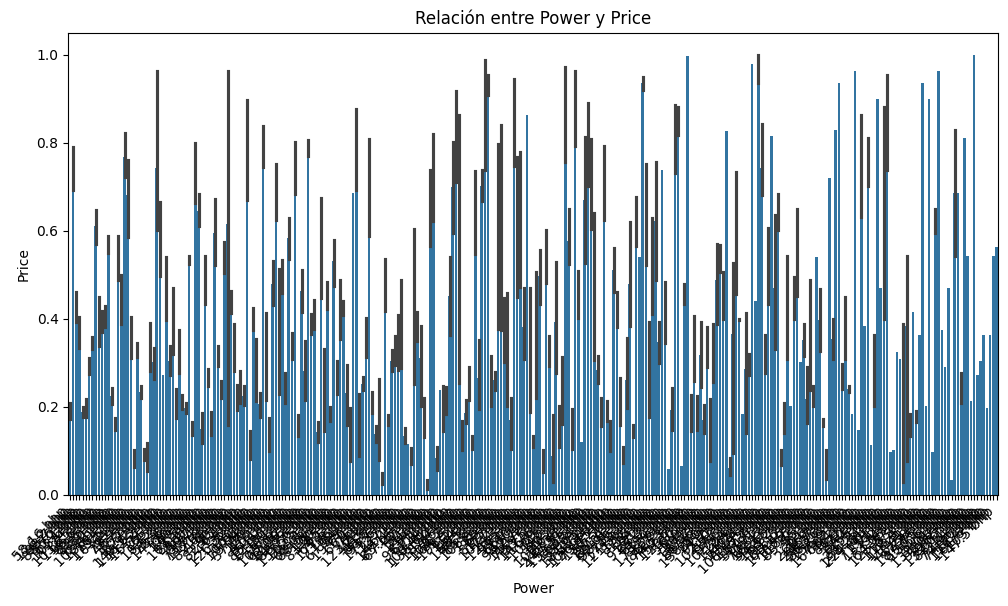

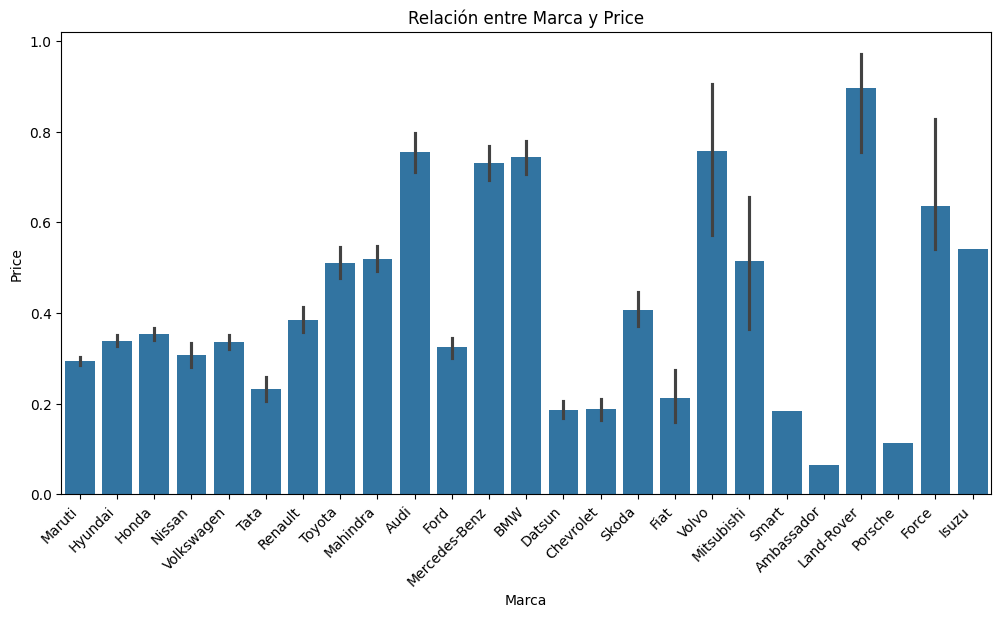

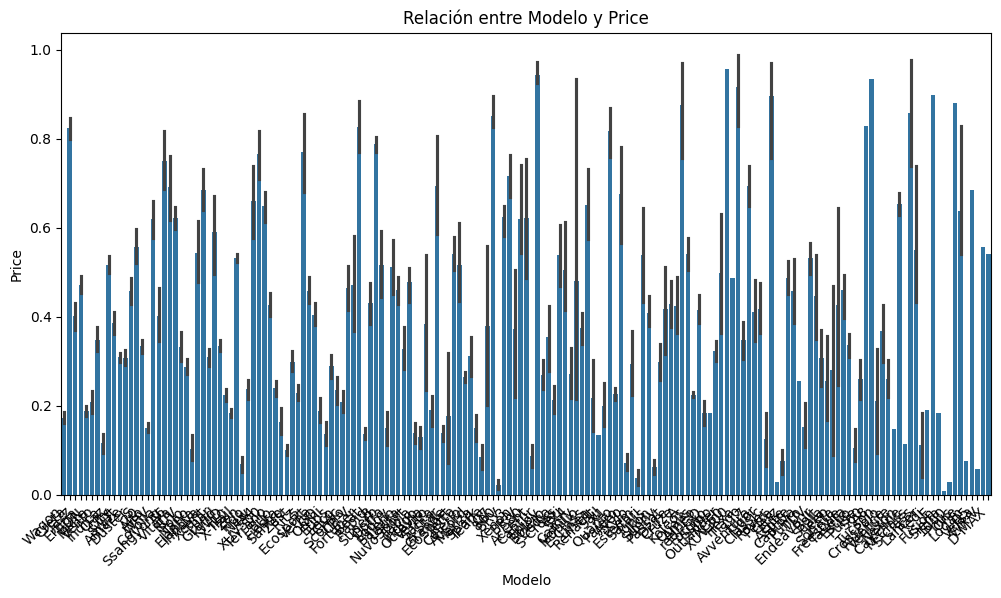

In [ ]:
# Ejemplo de diagramas de barras
categorias_categoricas = ['Location', 'Fuel_Type', 'Transmission', 'Mileage', 'Engine', 'Power', 'Marca', 'Modelo']
variable_continua = 'Price'
for categoria in categorias_categoricas:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_coches, x=categoria, y=variable_continua)
    plt.title(f'Relación entre {categoria} y {variable_continua}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

Hemos observado como se afecta los distintos valores de una variable categorica con respecto a nuestra variable continua objetivo 'price'

**Realiza un análisis mutivariado: El análisis multivariado es uno de los métodos más útiles para determinar relaciones y analizar patrones para cualquier conjunto de datos. Realiza un mapa de calor. ¿que has observado?**

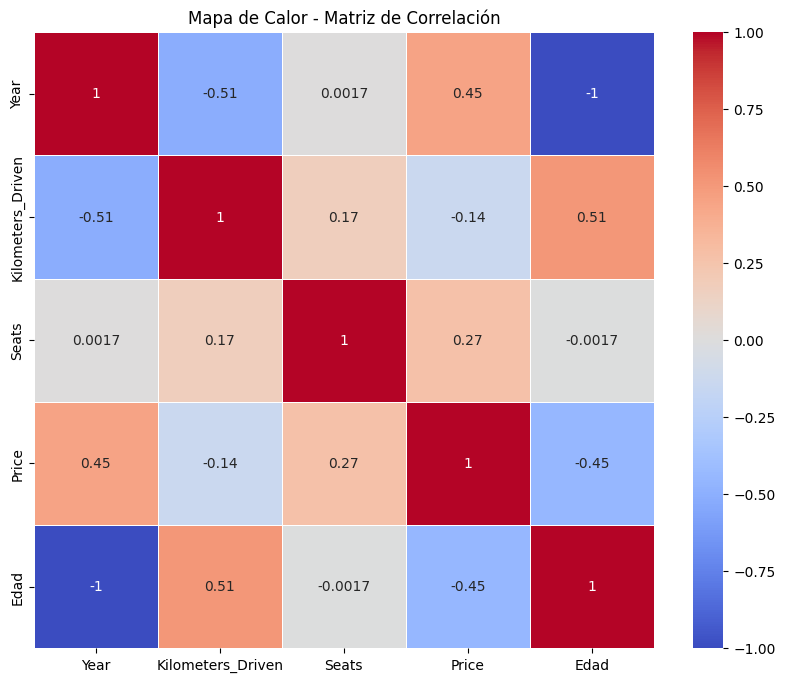

In [ ]:
# Selecciona las columnas relevantes para el análisis multivariado
columnas_multivariadas = ['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Edad']

# Calcula la matriz de correlación
matriz_correlacion = df_coches[columnas_multivariadas].corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

Hemos observado la relación que tienen entre las distintas variables numéricas

**Imputa valores faltantes y dí que método has seguido**

In [ ]:
from sklearn.impute import SimpleImputer

# Crear una copia del DataFrame para evitar cambios en el original
df_imputado = df_coches.copy()

# Identificar variables categóricas y numéricas
columnas_categoricas = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price', 'Marca', 'Modelo']
columnas_numericas = ['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Edad']

# Imputar valores faltantes en variables categóricas con la moda
imputador_categorico = SimpleImputer(strategy='most_frequent')
df_imputado[columnas_categoricas] = imputador_categorico.fit_transform(df_imputado[columnas_categoricas])

# Imputar valores faltantes en variables numéricas con la media
imputador_numerico = SimpleImputer(strategy='mean')
df_imputado[columnas_numericas] = imputador_numerico.fit_transform(df_imputado[columnas_numericas])

# Verificar si hay algún valor faltante después de la imputación
print("Valores faltantes después de la imputación:")
print(df_imputado.isnull().sum())

Valores faltantes después de la imputación:
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Edad                 0
Marca                0
Modelo               0
dtype: int64


**Redacta las conclusiones a las que has llegado tras analizar los factores que influyen en el precio de un coche usado**

El año de fabricación del coche tiene una fuerte influencia en su precio. Los coches más recientes tienden a tener precios más altos debido a las características actualizadas y la depreciación.

El kilometraje recorrido puede afectar significativamente el precio. Los coches con menor kilometraje suelen tener un precio más alto debido a un menor desgaste y, a menudo, se perciben como más valiosos.

La marca y el modelo del coche son factores clave. Marcas y modelos premium o de lujo suelen tener precios más altos debido a la calidad percibida y las características adicionales.

Los coches con transmisión automática o con tipos de combustible más eficientes pueden tener precios más altos.

La ubicación geográfica también puede afectar el precio. En áreas urbanas o lugares con mayor demanda de ciertos tipos de vehículos, los precios pueden ser más altos.

El número de asientos puede influir en el precio, ya que los coches con mayor capacidad de pasajeros a menudo se valoran más.

Además del año de fabricación, la edad del coche puede tener un impacto en el precio, ya que refleja la antigüedad del vehículo.